<a href="https://colab.research.google.com/github/PalmerTurley34/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/134_Asgmt_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df_with_labels = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df_with_labels.shape)
df_with_labels.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [129]:
df = df_with_labels.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


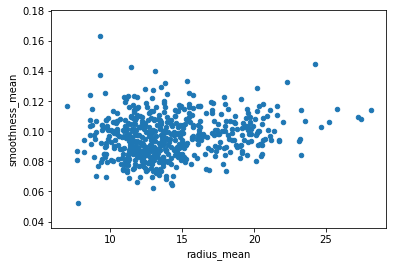

In [130]:
# looks like there's a little bit of clustering here
df.plot.scatter('radius_mean', 'smoothness_mean');

In [0]:
# Perform K-Means Clustering on the Dataset
features = ['radius_mean', 'smoothness_mean']
k = 2
model = KMeans(n_clusters=2)

In [132]:
# apply model to the data
model.fit_transform(df[features].values)

array([[ 5.54433714,  1.19401141],
       [ 8.12429463,  1.38621337],
       [ 7.24430262,  0.50621338],
       ...,
       [ 4.15430138,  2.58392085],
       [ 8.15431973,  1.41623568],
       [ 4.68590415, 11.42397243]])

In [0]:
df['cluster'] = model.labels_

In [0]:
# find the centroids of the clusters
centroids = model.cluster_centers_

In [0]:
# turn centroids into a data frame
cc = pd.DataFrame(centroids)

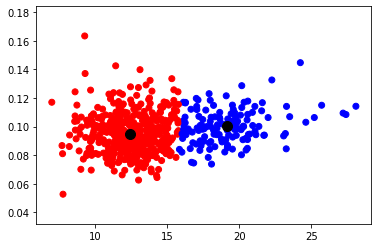

In [136]:
# plot the clusters
base_colors = ['r', 'b']
colors = [base_colors[centroid] for centroid in model.labels_]

fig, ax = plt.subplots()
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c='k', s=100);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [137]:
# Your Code Here
df_with_labels['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [138]:
# change B and M to 0 and 1 respectively
df_with_labels['diagnosis'] = df_with_labels['diagnosis'].replace({'B':0,'M':1})
df_with_labels.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
200,877501,0,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.06013,0.3534,1.3260,2.308,27.24,0.007514,0.01779,0.01401,0.01140,0.01503,0.003338,14.44,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.1080,0.2668,0.08174,NaN
176,872608,0,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,0.4311,2.2610,3.132,27.48,0.012860,0.08808,0.11970,0.02460,0.03880,0.017920,11.26,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.0991,0.2614,0.11620,NaN
89,861598,0,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.04412,0.04436,0.01623,0.02427,0.004841,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.1397,0.3151,0.08473,NaN
517,916838,1,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,0.5079,0.8737,3.654,59.70,0.005089,0.02303,0.03052,0.01178,0.01057,0.003391,23.73,25.23,160.50,1646.0,0.1417,0.3309,0.4185,0.1613,0.2549,0.09136,NaN
469,911366,0,11.620,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,0.4101,1.7400,3.027,27.85,0.014590,0.03206,0.04961,0.01841,0.01807,0.005217,13.36,25.40,88.14,528.1,0.1780,0.2878,0.3186,0.1416,0.2660,0.09270,NaN


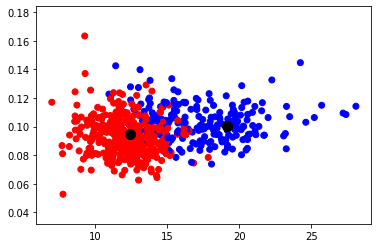

In [139]:
# repeat the above plot using diagnosis instead of model.labels_
base_colors = ['r', 'b']
colors = [base_colors[diag] for diag in df_with_labels['diagnosis']]

fig, ax = plt.subplots()
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c='k', s=100);
# looks somewhat similar

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
# drop the first and last column
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [141]:
print(df.shape)
df.head()

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [0]:
# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [0]:
# turn it into a data frame
scaled_df = pd.DataFrame(scaled_data, columns=list(df.columns))

In [144]:
# it worked
print(scaled_df.mean())
scaled_df.head()

radius_mean               -1.256562e-16
texture_mean               1.049736e-16
perimeter_mean            -1.272171e-16
area_mean                 -1.900452e-16
smoothness_mean            1.490704e-16
compactness_mean           2.544342e-16
concavity_mean            -1.338511e-16
concave points_mean       -8.429110e-17
symmetry_mean              2.081912e-16
fractal_dimension_mean     5.408679e-16
radius_se                  2.475807e-16
texture_se                -9.912009e-17
perimeter_se              -2.968237e-16
area_se                   -1.088760e-16
smoothness_se              4.426014e-16
compactness_se             1.958988e-16
concavity_se               1.678017e-16
concave points_se          2.185325e-17
symmetry_se                1.523874e-16
fractal_dimension_se      -5.658430e-17
radius_worst              -7.988142e-16
texture_worst             -1.834112e-17
perimeter_worst           -4.015534e-16
area_worst                -2.848727e-17
smoothness_worst          -2.189227e-16


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.734083
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.734083
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.734083
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-0.576674
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.734083


In [0]:
# apply pca
mypca = PCA(n_components=2)
pca_features = mypca.fit_transform(scaled_df)

In [146]:
# check variance ratio
mypca.explained_variance_ratio_

array([0.4445464 , 0.18930921])

In [0]:
# make a data frame
pca_df=pd.DataFrame(pca_features, columns=['comp_1', 'comp_2'])

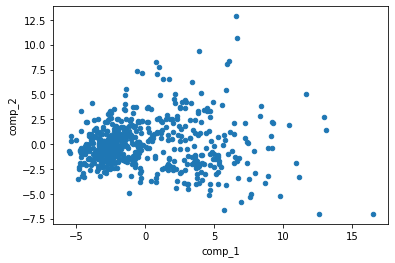

In [148]:
# plot the data
pca_df.plot.scatter('comp_1', 'comp_2');

In [0]:
# scree plot to find best number of clusters
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    sum_of_squared_distances.append(km.inertia_)

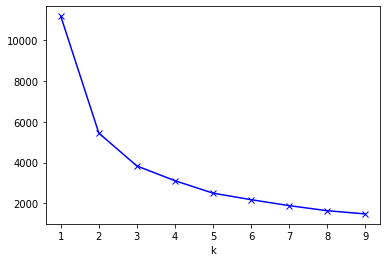

In [150]:
# I'll do two clusters but I could probably use three or four for better results
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k');

In [151]:
# k means clustering
model = KMeans(n_clusters=2)
model.fit_transform(pca_df.values)

array([[11.66012602,  5.19221652],
       [ 6.31733612,  4.17474363],
       [ 8.22732996,  1.60408376],
       ...,
       [ 4.35418485,  3.60764126],
       [12.77582467,  6.18768776],
       [ 3.43076869, 10.14061006]])

In [0]:
pca_df['cluster'] = model.labels_

In [0]:
centroids = model.cluster_centers_

In [0]:
cc = pd.DataFrame(centroids)

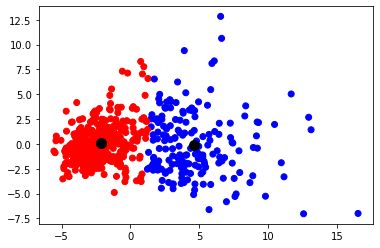

In [155]:
# plot the data
base_colors = ['r', 'b']
colors = [base_colors[centroid] for centroid in model.labels_]

fig, ax = plt.subplots()
ax.scatter(pca_df['comp_1'], pca_df['comp_2'], c=colors)
ax.scatter(cc[0], cc[1], c='k', s=100);

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
# assign actual diagnosis to pca df
pca_df['actual'] = df_with_labels['diagnosis']

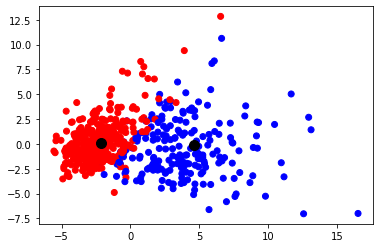

In [157]:
# plot the actual diagnosis clusters after pca
base_colors = ['r', 'b']
colors = [base_colors[diag] for diag in pca_df['actual']]

fig, ax = plt.subplots()
ax.scatter(pca_df['comp_1'], pca_df['comp_2'], c=colors)
ax.scatter(cc[0], cc[1], c='k', s=100);

In [158]:
# check pca accuracy
from sklearn.metrics import accuracy_score
accuracy_score(pca_df['actual'], pca_df['cluster'])

0.9209138840070299

In [159]:
# chekc raw data accuracy
accuracy_score(df_with_labels['diagnosis'], df['cluster'])

0.8558875219683656

Both models have a pretty high accuracy but the clustering model after PCA is a more accurate.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project